## Введение в анализ данных, ИАД-2

## НИУ ВШЭ, 2018-19 учебный год

### Домашнее задание №2

Задание выполнил(а): _(впишите свои фамилию и имя)_

### Общая информация

__Дата выдачи:__ 04.03.2019

__Дедлайн:__ 23:59 17.03.2019

### Оценивание и штрафы

Оценка за ДЗ вычисляется по следующей формуле:

$$
\text{points} \times 10 / 16,
$$

где points — количество баллов за обязательную часть, которое вы набрали. Максимальное число баллов, которое можно получить за обязательную часть — 16, а максимальное число дополнительных баллов, которые пойдут в бонус — 2.5. Бонусные задания отмечены звездочками (*).

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

Инвайт для группы ИАД-2: zCH4F32

# kNN своими руками (4)

Реализуйте взвешенный алгоритм kNN для регрессии. Пусть нам нужно вычислить значение $y$ для некоторого $x$ при известных данных $\left(x_1, y_1\right), \ldots, \left(x_\ell, y_\ell\right)$. Предсказанием вашего регрессора будет являться

$$
\hat{y} = \frac{\sum\limits_{i=1}^kw_iy_{(i)}}{\sum\limits_{i=1}^kw_i},
$$
где $\left(x_{(1)}, y_{(1)}\right), \ldots, \left(x_{(k)}, y_{(k)}\right)$ - ближайшие $k$ объектов к $x$ по некоторой метрике $d(\cdot, \cdot)$, а $w_i = \frac{1}{d\left(x, x_{(i)}\right)}$. Ваш алгоритм должен уметь работать с двумя метриками:

$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_2 = \sqrt{\sum\limits_{j=1}^n\left(x_{(i)}^j - x^j\right)^2}\qquad\text{(евклидова)}
$$
$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_1 = \sum\limits_{j=1}^n\left|x_{(i)}^j - x^j\right|\qquad\text{(манхэттена)}
$$

Сверьте для нескольких комбинаций различных параметров свой результат на искусственной выборке с результатом соответствующего алгоритма из `sklearn` по метрике качества MSE.

In [1]:
import numpy as np
from sklearn.metrics import mean_squared_error, make_scorer

In [2]:
class KNN:
    def __init__(self, metric='euclid', k=5):
        """
        PARAMETERS:
        metric ('euclid' or 'manhattan')
        k - number of nearest neighbors
        """
        if metric == 'euclid':
            self.metric = euclid
        elif metric == 'manhattan':
            self.metric = manhattan
            
        self.k = k
        
        self.X_train = None
        self.y_train = None
        
    def fit(self, X_train, y_train):
        """
        INPUT:
        X_train - np.array of shape (l, d)
        y_train - np.array of shape (l,)
        """
        self.X_train = X_train
        self.y_train = y_train
        
        return self
        
    def predict(self, X_test):
        """
        INPUT:
        X_test - np.array of shape (m, d)
        
        OUTPUT:
        y_pred - np.array of shape (m,)
        """
        y_pred = np.array([])
        
        for obj_test in X_test:
            index = 0
            distance = []
            for obj_train in self.X_train:
                distance.append((index, self.metric(obj_test, obj_train)))
                index += 1
            distance = sorted(distance, key=lambda x: x[1])[0:self.k]
            wy = 0
            w = 0
            for neighbor in distance:
                wy += (1/neighbor[1]) * self.y_train[neighbor[0]]
                w += 1/neighbor[1]
            y_pred = np.append(y_pred, wy / w)
                
        return y_pred
        
        

In [3]:
def euclid(x, xi):
    return np.sqrt(((x - xi) ** 2).sum())

In [4]:
def manhattan(x, xi):
    return np.absolute(x - xi).sum()

In [5]:
np.random.seed(17032019)
X_train = np.random.randn(1000, 50)
y_train = np.random.randn(1000,)
X_test = np.random.randn(500, 50)
y_test = np.random.randn(500,)

In [6]:
knn = KNN()

In [7]:
knn.fit(X_train, y_train)

In [8]:
mean_squared_error(y_test, knn.predict(X_test))

1.143364989935662

In [9]:
from sklearn.neighbors import KNeighborsRegressor

In [10]:
neigh = KNeighborsRegressor(n_neighbors=5, metric='euclidean')

In [11]:
neigh.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [12]:
mean_squared_error(y_test, neigh.predict(X_test)) 

1.143019350619603

# Линейная регрессия своими руками (4)

Реализуйте линейную регрессию с градиентным спуском для [функции потерь Хьюбера](https://en.wikipedia.org/wiki/Huber_loss):

$$
L_\delta\left(y, \hat{y}\right) =
\begin{cases}
\frac{1}{2}\left(y - \hat{y}\right)^2, \qquad &|y - \hat{y}| \leq \delta\\
\delta\left|y - \hat{y}\right| - \frac{1}{2}\delta^2,\qquad & \text{otherwise}
\end{cases}
$$

В таком случае общее значение функции потерь на всем датасете $(x_1, y_1), \ldots, (x_\ell, y_\ell)$ будет равно

$$
L = \frac{1}{\ell}\sum\limits_{i=1}^\ell L_\delta\left(y_i, \hat{y}_i\right)
$$

Проверьте работу вашего метода: выведите результаты его работы на той же искусственной выборке, что и в задаче выше (в качестве метрик качества используйте MSE и Huber loss). Постройте график зависимости значения функции потерь от итерации градиентного спуска.

*Вы можете опустить единичный признак в модели и не добавлять его в данные. Для данной искусственной выборки это не актуально, потому что целевая переменная в этом случае является случайной величиной из стандартного нормального распределения со средним 0.*

*Вектор весов в градиентном спуске можете инициализировать нулями.*

In [13]:
class LinearRegressionHuber:
    def __init__(self, delta=1.0, max_iter=1000, tol=1e-6, eta=1e-2):
        """
        PARAMETERS:
        delta - scalar in Huber loss
        max_iter - maximum possible number of iterations in Gradient Descent
        tol - precision for stopping criterion in Gradient Descent
        eta - step size in Gradient Descent
        """
        
        self.delta = delta
        self.max_iter = max_iter
        self.tol = tol
        self.eta = eta
        
        self.w = None
        self.w = np.zeros(50,)
        self.loss_history = None
        
    def fit(self, X_train, y_train):
        """
        INPUT:
        X_train - np.array of shape (l, d)
        y_train - np.array of shape (l,)
        """
        
        cost = np.array([])
        for i in range(self.max_iter):
            
            new_w = self.w - self.calc_gradient(X_train, y_train) * (self.eta / len(X_train))
            cost = np.append(cost, self.calc_loss(X_train, y_train))
            if np.linalg.norm(new_w - self.w) <= self.tol:
                self.w = new_w
                break
            self.w = new_w
        
        self.loss_history = cost
        return self.loss_history
        
        
    def predict(self, X_test):
        """
        INPUT:
        X_test - np.array of shape (m, d)
        
        OUTPUT:
        y_pred - np.array of shape (m,)
        """
        
        return (X_test * self.w).sum(axis=1)

        
    
    def calc_gradient(self, X, y):
        """
        Calculates the gradient of Huber loss by weights.
        
        INPUT:
        X - np.array of shape (l, d)
        y - np.array of shape (l,)
        
        OUTPUT:
        grad - np.array of shape (d,)
        """
        grad1 = np.array([])
        grad2 = np.array([])
        
        X_huber1 = np.array([])
        y_huber1 = np.array([])
        
        X_huber2 = np.array([])
        y_huber2 = np.array([])
        
        X_huber1.shape = (0, X.shape[1]) 
        X_huber2.shape = (0, X.shape[1]) 
        
        for X, y in zip(X, y):
    
            if abs(X @ self.w - y) <= self.delta:
                X_huber1 = np.vstack((X_huber1, X))
                y_huber1 = np.append(y_huber1, y)
            else:
                X_huber2 = np.vstack((X_huber2, X))
                y_huber2 = np.append(y_huber2, y)
                

            
        grad1 = np.append(grad1, (X_huber1 @ self.w - y_huber1) @ X_huber1)
        grad2 = np.append(grad2, self.delta * np.sign(X_huber2 @ self.w - y_huber2) @ X_huber2)
            
            
            
        grad = grad1 + grad2 
        return grad
    
    def calc_loss(self, X, y):
        """
        Calculates the Huber loss.
        
        INPUT:
        X - np.array of shape (l, d)
        y - np.array of shape (l,)
        
        OUTPUT:
        loss - float
        """
        loss = 0
        count = X.shape[0]
        for X, y in zip(X, y):
            
            if abs(X @ self.w - y) <= self.delta:
                loss += 0.5 * (X @ self.w - y) ** 2
            else:
                loss += self.delta * abs(X @ self.w - y) - 0.5 * self.delta ** 2
                      
        return (loss / count)
        

In [14]:
l = LinearRegressionHuber()

In [15]:
%%time
l.fit(X_train, y_train)

CPU times: user 46.5 s, sys: 537 ms, total: 47 s
Wall time: 25.9 s


array([0.42356447, 0.42336639, 0.42317097, 0.42297819, 0.42278801,
       0.4226004 , 0.42241534, 0.42223279, 0.42205271, 0.42187506,
       0.42169981, 0.42152693, 0.42135639, 0.42118815, 0.42102219,
       0.42085847, 0.42069695, 0.42053761, 0.42038042, 0.42022538,
       0.42007244, 0.41992158, 0.41977277, 0.41962597, 0.41948115,
       0.41933828, 0.41919734, 0.41905829, 0.41892112, 0.41878578,
       0.41865226, 0.41852052, 0.41839053, 0.41826228, 0.41813572,
       0.41801083, 0.4178876 , 0.41776599, 0.41764599, 0.41752758,
       0.41741074, 0.41729544, 0.41718167, 0.41706939, 0.4169586 ,
       0.41684926, 0.41674137, 0.41663489, 0.41652981, 0.41642611,
       0.41632378, 0.41622281, 0.41612316, 0.41602483, 0.41592779,
       0.41583202, 0.41573752, 0.41564425, 0.41555221, 0.41546138,
       0.41537173, 0.41528326, 0.41519594, 0.41510977, 0.41502472,
       0.41494077, 0.41485791, 0.41477612, 0.41469538, 0.41461568,
       0.414537  , 0.41445933, 0.41438266, 0.41430697, 0.41423

In [16]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Huber loss dependence on GD iteration')

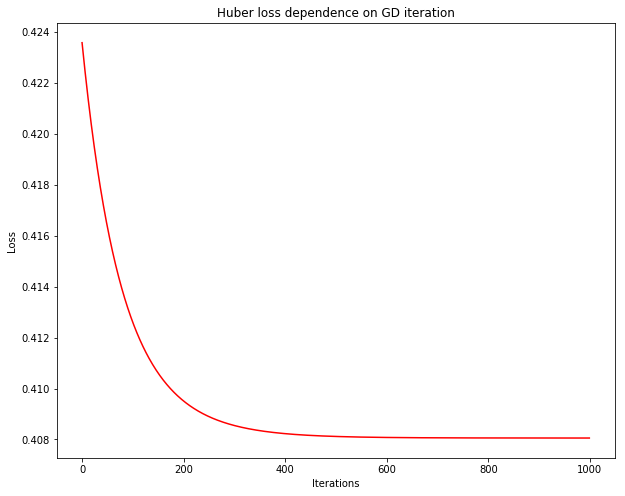

In [17]:
fig, ax = plt.subplots(figsize=(10, 8))  
ax.plot(np.arange(len(l.loss_history)), l.loss_history, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Loss')  
ax.set_title('Huber loss dependence on GD iteration')  

In [18]:
mean_squared_error(y_test, l.predict(X_test)) 

1.091952430747943

In [19]:
from sklearn.linear_model import HuberRegressor

In [20]:
huber = HuberRegressor()

In [21]:
huber.fit(X_train, y_train)

HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
        tol=1e-05, warm_start=False)

In [22]:
mean_squared_error(y_test, huber.predict(X_test)) 

1.095104163225779

# Практика

Пожалуйста, при использовании различных функций из библиотек импортируйте все, что вам понадобилось в данной части, в следующем блоке:

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, f_regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures, LabelEncoder
from collections import OrderedDict, defaultdict
from math import sqrt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline


In [24]:
import warnings

warnings.filterwarnings('ignore')

В этом домашнем задании вы поработаете с данными из другого соревнования на Kaggle: https://www.kaggle.com/c/house-prices-advanced-regression-techniques. Задача - предсказание цены дома.

In [69]:
data = pd.read_csv('train.csv', header=0)

In [70]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [71]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [72]:
data.drop('Id', axis=1, inplace=True)

## 1 (1)

Есть ли в данных пропуски? Если да, то для каждого столбца, в котором они имеются, посчитайте их количество и их долю от общего числа значений. Что вы наблюдаете?

In [73]:
x = (data.isnull().sum().sort_values(ascending=False)).to_frame(name="Null amount")

In [74]:
x['Null %'] = data.isnull().sum().sort_values(ascending=False) / data.shape[0]

In [75]:
x[x["Null amount"] != 0]

,Null amount,Null %
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


In [76]:
data.shape

(1460, 80)

### Заметим, что в признаках PoolQC, MiscFeature, Alley и Fence очень большая доля пропусков. По логике, их стоит удалить. НО! Если посмотреть описание признаков в Кагле, то у многих предусмотрено значение None. Поэтому, для некоторых категориальных/порядковых признаков я вместо пропусков добавлю новое значение "NA"

## 2 (1)

Избавьтесь от пропусков. Для каждого из примененных методов обоснуйте свое решение. **Проверьте, что вы действительно избавились от пропусков.**

*Напоминание. В зависимости от типа столбца, можно заполнить пропуски, например, средним арифметическим, медианой, модой, можно какими-то отдельными значениями. А можно такие столбцы вообще удалить.*

Добавляю новый класс NA

In [77]:
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
           'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'BsmtFinType2', 
            'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType']:
    data[col] = data[col].fillna('NA')


Если в доме нет гаража, тогда все эти признаки обращаются в 0

In [78]:
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars', 'MasVnrArea']:
    data[col] = data[col].fillna(0)

Заполняю пропуски модой, чтобы несильно изменить распределение

In [79]:
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])

Здесь я выбираю медиану LotFrontage в зависимости от Neighborhood дома

In [80]:
data['LotFrontage'] = data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

Utilities для меня не играет большую роль

In [81]:
data = data.drop(['Utilities'], axis=1)

In [82]:
data.isnull().any().any()

False

## 3 (1)

Обработайте категориальные признаки. В их обнаружении вам может помочь синтаксис `pandas` (например, можно обратить внимание на типы столбцов), а также описание датасета и его исследование. Объясните выбор метода (one-hot-encoding, label encoding, ...)

Важный момент! MSSubClass - категориальный признак, но в датасете он вещественный. Это я исправляю

In [85]:
data[categoricals].columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition', 'MSSubClass'],
      dtype='object')

In [83]:
categoricals = pd.concat([data.select_dtypes(include=['object']), data.MSSubClass], axis=1).columns

In [40]:
numerics = data.select_dtypes(exclude=['object']).columns

comparable_cat это порядковые признаки

In [41]:
comparable_cat = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 
                 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 
                 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
                 'Fence', 'Street', 'Alley']

In [42]:
data_cat = pd.DataFrame()

In [43]:
qual_cat = [
    'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu',
    'GarageQual', 'GarageCond', 'PoolQC'
]

Порядковые признаки comparable_cat я кодирую с помощью Label encoding, а остальные с помощью one-hot

In [44]:
for c in categoricals:
    if c in comparable_cat:
        encoder = LabelEncoder()
        encoder.fit_transform(data[c])
        """
        Здесь я корректирую label encoder. 
        Дело в том, что порядок классов, который он определяет автоматически, отличается от нужного.
        """
        
        
        if c in qual_cat:
            encoder.classes_ = np.array(['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'])
            data_cat[c] = encoder.transform(data[categoricals][c])
            continue
   
        if c == 'BsmtExposure':
            encoder.classes_ = np.array(['NA', 'No', 'Mn', 'Av', 'Gd'])
            data_cat[c] = encoder.transform(data[categoricals][c])
            continue
        
        if (c == 'BsmtFinType1') | (c == 'BsmtFinType2') :
            encoder.classes_ = np.array(['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'])
            data_cat[c] = encoder.transform(data[categoricals][c])
            continue
           
        if c == 'GarageFinish':
            encoder.classes_ = np.array(['NA', 'Unf', 'RFn', 'Fin'])
            data_cat[c] = encoder.transform(data[categoricals][c])
            continue
           
        if c == 'Fence':
            encoder.classes_ = np.array(['NA', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'])
            data_cat[c] = encoder.transform(data[categoricals][c])
            continue
        
        if c == 'Alley':
            encoder.classes_ = np.array(['NA', 'Grvl', 'Pave'])
            data_cat[c] = encoder.transform(data[categoricals][c])
            continue
        
        data_cat[c] = encoder.fit_transform(data[categoricals][c])
             
    else:
        data_cat = pd.concat([data_cat, pd.get_dummies(data[categoricals][c])], axis = 1)

In [45]:
data_cat.shape

(1460, 214)

In [46]:
data = pd.concat([data_cat, 
                  data[numerics]], axis=1)

In [47]:
data.shape

(1460, 251)

In [48]:
answer = {}
for x in data.columns:
    if x in answer:
        answer[x] += 1
    else:
        answer[x] = 1

for key in answer:
    if answer[key] > 1:
        res = data[key].sum(axis = 1)
        data = data.drop(columns=key)
        data[key] = res

In [49]:
data.head()

,C (all),FV,RH,RL,RM,Street,Alley,IR1,IR2,IR3,...,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,NA,N,Y
0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,2,0,1,0,2
1,0,0,0,1,0,1,0,0,0,0,...,0,2,0,0,0,0,0,1,0,2
2,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,2,0,1,0,2
3,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,1,1,0,2
4,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,2,0,1,0,2


In [63]:
data.corr().SalePrice['RL']

0.24506340389709183

## 4 (0.5)

Вычислите и визуализируйте попарную корреляцию Пирсона между всеми признаками. Какие выводы можно сделать?

*Для визуализации можно использовать `seaborn.heatmap()`.*

In [51]:
data.corr()

,C (all),FV,RH,RL,RM,Street,Alley,IR1,IR2,IR3,...,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,NA,N,Y
C (all),1.000000,-0.017926,-0.008742,-0.160278,-0.034792,-0.254287,0.069109,-0.040840,-0.014116,-0.006897,...,-0.006652,0.082590,0.004569,0.000955,-0.011735,-0.061148,0.015480,-0.006519,0.203839,-0.186298
FV,-0.017926,1.000000,-0.022722,-0.416608,-0.090435,0.013866,0.376018,-0.081464,0.023612,-0.017926,...,-0.017290,0.125380,-0.070687,0.052684,-0.030503,0.079296,-0.089591,0.015679,-0.068979,0.074847
RH,-0.008742,-0.022722,1.000000,-0.203158,-0.044101,0.006762,0.045155,-0.046176,0.021930,-0.008742,...,-0.008432,0.067444,-0.009307,-0.034149,0.011739,-0.028923,0.025557,0.077909,0.148869,-0.149391
RL,-0.160278,-0.416608,-0.203158,1.000000,-0.808585,0.045348,-0.351851,0.261574,0.027175,0.022698,...,0.023676,-0.164085,0.156847,0.032905,-0.048881,0.077243,-0.082465,-0.096596,-0.261531,0.266492
RM,-0.034792,-0.090435,-0.044101,-0.808585,1.000000,-0.003127,0.156475,-0.229711,-0.047949,-0.011491,...,-0.013127,0.076689,-0.137196,-0.058447,0.072961,-0.111819,0.135313,0.080387,0.249005,-0.261992
Street,-0.254287,0.013866,0.006762,0.045348,-0.003127,1.000000,0.015611,0.022494,-0.053886,0.005335,...,0.005145,-0.033583,-0.019914,0.020840,0.009077,0.047300,-0.037732,0.075159,-0.060474,0.053354
Alley,0.069109,0.376018,0.045155,-0.351851,0.156475,0.015611,1.000000,-0.100742,0.003267,0.002141,...,-0.019466,0.153104,-0.079584,-0.010810,0.129510,-0.060462,0.059697,0.035181,0.191639,-0.197513
IR1,-0.040840,-0.081464,-0.046176,0.261574,-0.229711,0.022494,-0.100742,1.000000,-0.119701,-0.058481,...,0.005467,-0.082103,0.094949,0.089234,-0.022995,0.066302,-0.075689,-0.060044,-0.122293,0.134548
IR2,-0.014116,0.023612,0.021930,0.027175,-0.047949,-0.053886,0.003267,-0.119701,1.000000,-0.014116,...,-0.013616,-0.024570,-0.000163,-0.027291,-0.007248,0.045419,-0.014445,-0.040495,-0.043863,0.039415
IR3,-0.006897,-0.017926,-0.008742,0.022698,-0.011491,0.005335,0.002141,-0.058481,-0.014116,1.000000,...,-0.006652,-0.034936,0.004569,0.000955,0.055454,0.043986,-0.009494,-0.006519,0.015349,-0.010313


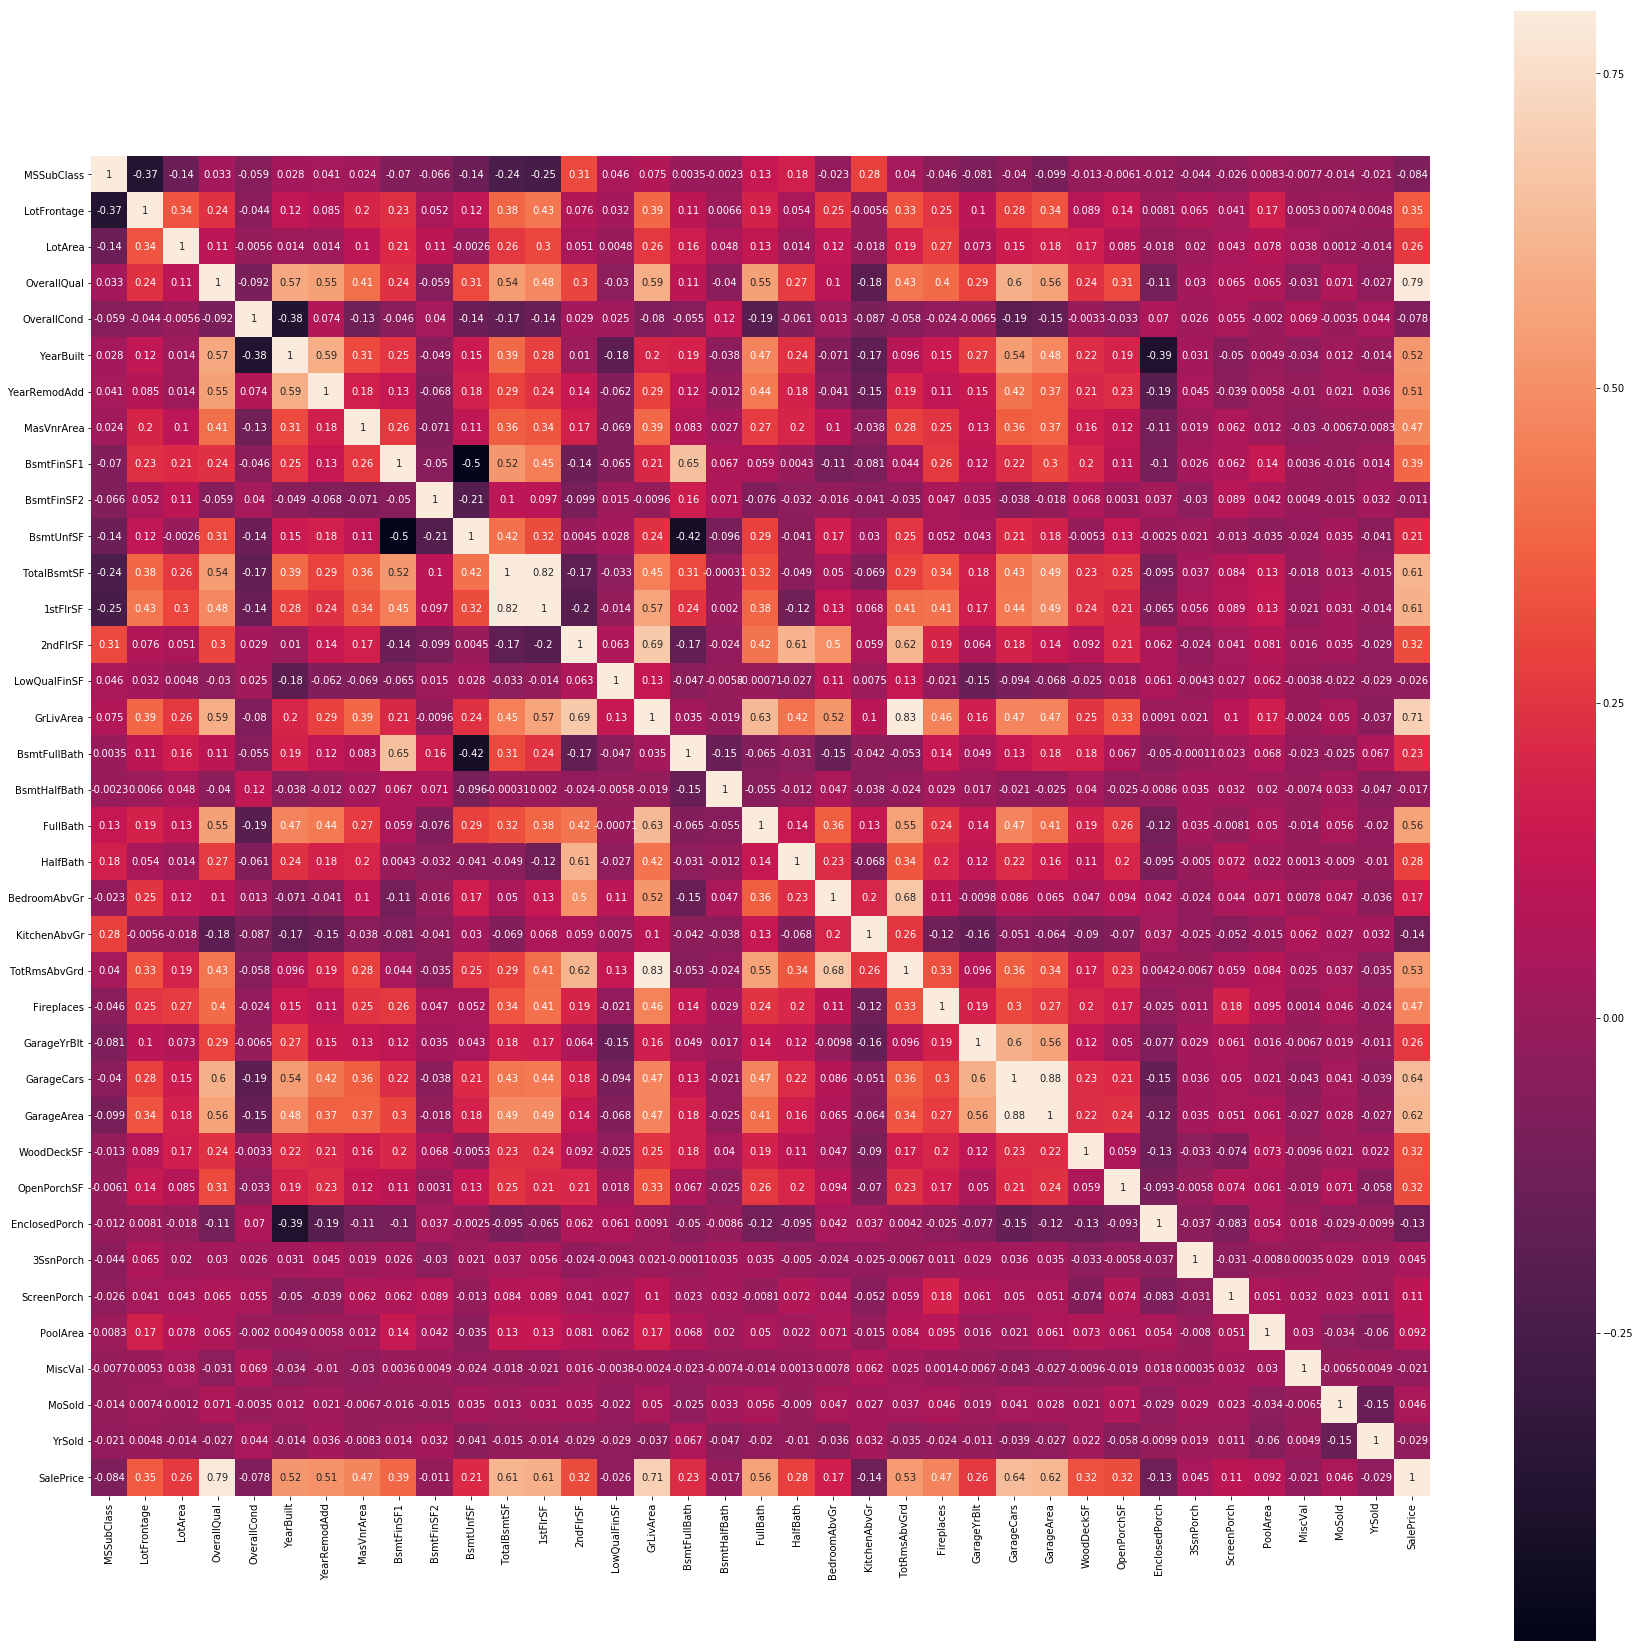

In [53]:
corrmat = data[numerics].corr()
y, x = plt.subplots(figsize=(30,30))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True)

## 5 (0.5)

Найдите признаки с максимальным и минимальным **абсолютным** значением коэффициента корреляции Пирсона с предсказываемым значением. Изобразите на графиках зависимость найденных признаков от предсказываемого значения.

*Не забудьте указать название графика и обозначить, что изображено по каждой из осей.*

In [59]:
data.corr().SalePrice.abs().sort_values()[0::200]

Metal        0.000304
HeatingQC    0.427649
Name: SalePrice, dtype: float64

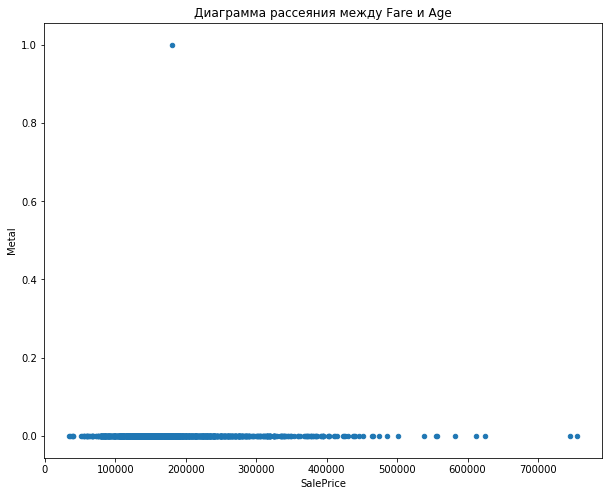

In [57]:
data.plot.scatter(y = 'Metal', x = 'SalePrice', title='Диаграмма рассеяния между Fare и Age', figsize=(10,8))

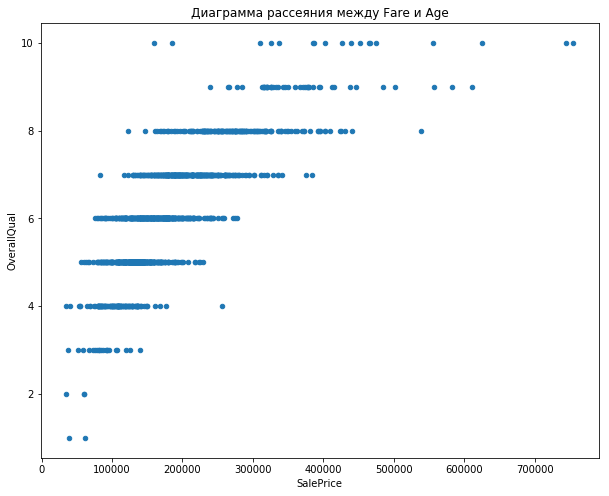

In [58]:
data.plot.scatter(y = 'OverallQual', x = 'SalePrice', title='Диаграмма рассеяния между Fare и Age', figsize=(10,8))

## 6 (0.5)

Постройте гистограмму распределения предсказываемого значения. Для избавления от разницы в масштабах, а также «смещения» распределения переменной в сторону нормального (что бывает полезно при статистическом анализе), можно прологарифмировать ее (это обратимое преобразование, поэтому целевую переменную легко восстановить). В данном случае воспользуйтесь `numpy.log1p`, чтобы сделать преобразование $y \to \ln\left(1 + y\right)$. Постройте гистограмму распределения от нового предсказываемого значения. Опишите наблюдения.

*В дальнейшем используйте в качестве предсказываемого значения вектор, который получился после логарифмирования.*

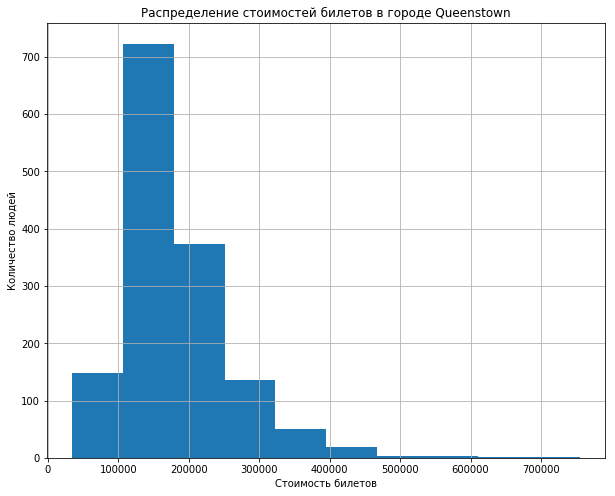

In [210]:
plt.figure(figsize=(10,8))
plt.title('Распределение стоимостей билетов в городе Queenstown')
data.SalePrice.hist()
plt.xlabel('Cтоимость билетов')
plt.ylabel('Количество людей')
plt.show()

In [211]:
data.SalePrice = np.log1p(data.SalePrice)

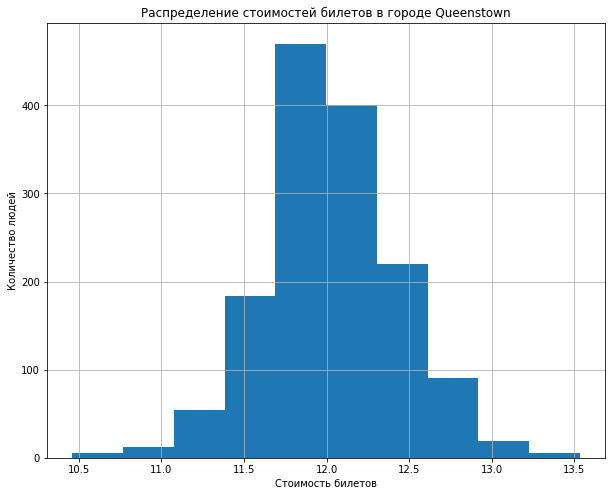

In [212]:
plt.figure(figsize=(10,8))
plt.title('Распределение стоимостей билетов в городе Queenstown')
data.SalePrice.hist()
plt.xlabel('Cтоимость билетов')
plt.ylabel('Количество людей')
plt.show()

Перейдем непосредственно к построению моделей. Разобьем выборку на обучение и контроль.

*Пожалуйста, **не меняйте** значение `random_state` в следующей ячейке.*

In [213]:
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

In [214]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=17032019)

In [215]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1095, 219), (365, 219), (1095,), (365,))

## 7 (2)

Примените к данным следующие алгоритмы:

- kNN
- линейная регрессия
- Lasso
- Ridge

Для каждого из методов подберите гиперпараметры с помощью кросс-валидации. Обучите алгоритмы с лучшими гиперпараметрами на обучающей выборке и оцените качество по метрике **Root** Mean Squared Error. Какой из методов показывает себя лучше?

In [151]:
def rmse(x, y):
    return np.sqrt(mean_squared_error(x, y))
rmse_metrics = make_scorer(rmse, greater_is_better=False)

In [141]:
knn = KNeighborsRegressor()
params = {'n_neighbors': np.arange(1, 51, 2), 
          'weights': ['uniform', 'distance'],}
knn_grid = GridSearchCV(knn, params, cv=5, scoring=rmse_metrics, n_jobs=1)
knn_grid.fit(X_train, y_train)
knn_grid.best_params_, abs(knn_grid.best_score_)

({'n_neighbors': 7, 'weights': 'distance'}, 0.22595299597745364)

In [230]:
lr = LinearRegression()
params = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
reg_grid = GridSearchCV(lr, params, cv=5, scoring=rmse_metrics)
reg_grid.fit(X_train, y_train)
reg_grid.best_params_, abs(reg_grid.best_score_)

({'copy_X': True, 'fit_intercept': True, 'normalize': False},
 0.13543533226797394)

In [231]:
ls = Lasso()
param_grid = {
    'alpha': np.arange(0.01, 10, 0.01)
}
ls_grid = GridSearchCV(ls, param_grid, cv=5, scoring=rmse_metrics)
ls_grid.fit(X_train, y_train)
ls_grid.best_params_, abs(ls_grid.best_score_)

({'alpha': 0.01}, 0.138484213447298)

In [232]:
rid = Ridge()
param_grid = {
    'alpha': np.arange(1, 40, 0.1),
}
rid_grid = GridSearchCV(rid, param_grid, cv=5, scoring=rmse_metrics)
rid_grid.fit(X_train, y_train)
rid_grid.best_params_, abs(rid_grid.best_score_)

({'alpha': 9.500000000000007}, 0.12342178675785388)

## 8 (1)

Постройте гистограммы значений весов для линейной регрессии, Lasso и Ridge. Опишите наблюдения. В чем различия между полученными наборами весов и почему?

В линейной регрессии масштаб весов разный. В гистограмме можем заметить, что есть вес -2
В лассо очень много нулевых весов, из-за этого у нас очень мало значимых весов
Распределение весов Ridge больше всех похоже на нормальное. Мы видим, что штраф за большие коэффиценты есть, 
но всё же нулевых весов гораздо меньше

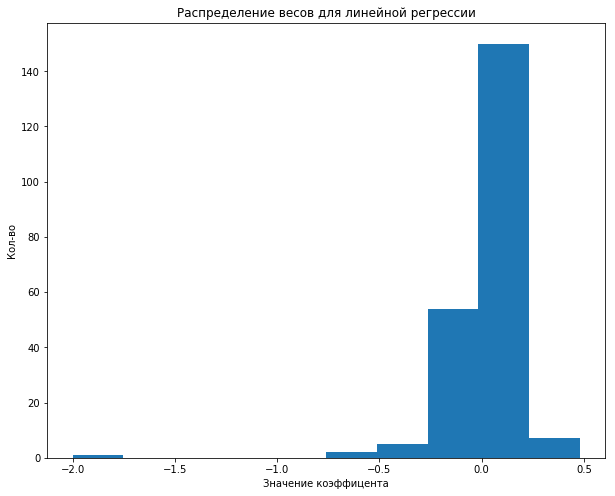

In [219]:
lr.fit(X_train, y_train)
plt.figure(figsize=(10,8))
plt.title('Распределение весов для линейной регрессии')
plt.hist(lr.coef_)
plt.xlabel('Значение коэффицента')
plt.ylabel('Кол-во')
plt.show()

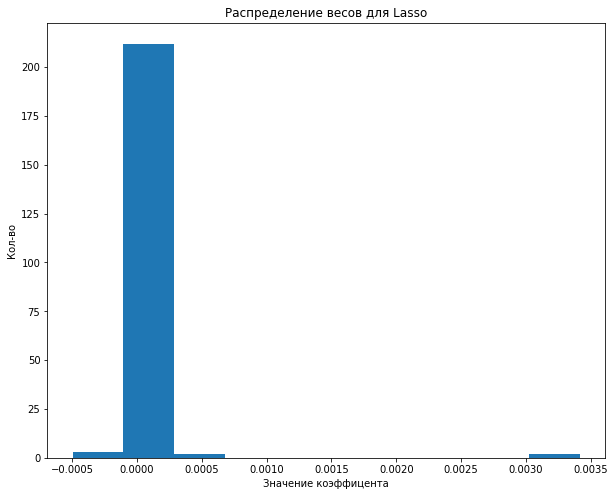

In [220]:
ls.alpha = 0.14999999999999997
ls.tol = 1e-05
ls.fit(X_train, y_train)
plt.figure(figsize=(10,8))
plt.title('Распределение весов для Lasso')
plt.hist(ls.coef_)
plt.xlabel('Значение коэффицента')
plt.ylabel('Кол-во')
plt.show()

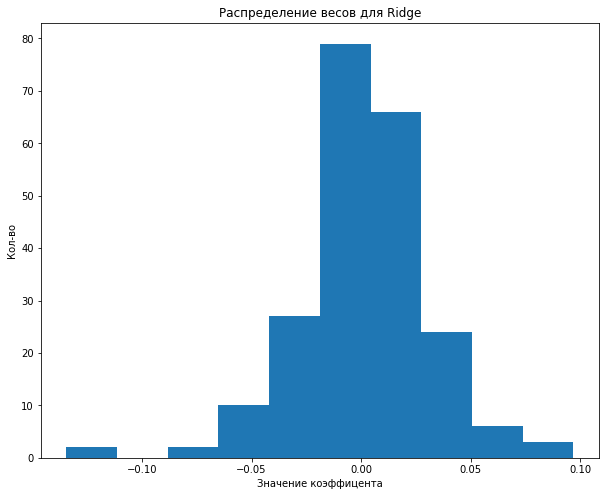

In [221]:
rid.alpha = 8.3
rid.tol = 1e-05
rid.fit(X_train, y_train)
plt.figure(figsize=(10,8))
plt.title('Распределение весов для Ridge')
plt.hist(rid.coef_)
plt.xlabel('Значение коэффицента')
plt.ylabel('Кол-во')
plt.show()

## 9 (0.5)

Добейтесь того, чтобы в заданиях выше ваш лучший алгоритм давал качество не больше 0.125 на тестовых данных по метрике RMSE (если вы дошли до этого задания, а качество выше уже удовлетворяет этому условию, вы автоматически получите за него полный балл).

In [222]:
poly = PolynomialFeatures(2)
df = pd.DataFrame(poly.fit_transform(data[['OverallQual', 'GrLivArea', 
                                           'TotalBsmtSF', 'GarageArea']]))

df = df.rename(columns={1: 'OverallQual', 2: 'GrLivArea' , 3: 'GarageCars',
                       4:'GarageArea', 5:'TotalBsmtSF'})

df = df.drop(columns=[0])

data = pd.concat([data.drop(columns=['OverallQual', 'GrLivArea', 'GarageCars',
                                              'GarageArea', 'TotalBsmtSF']),
                 df], axis=1)

In [223]:
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=17032019)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1095, 228), (365, 228), (1095,), (365,))

In [243]:
pipe = Pipeline(steps=[
    
    ('regressor', Ridge(30))
     ])

In [244]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('regressor', Ridge(alpha=30, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [245]:
sqrt(mean_squared_error(y_val, pipe.predict(X_val)))

0.11955686843563684

## 10* (0.5)

Добейтесь того, чтобы в заданиях выше ваш лучший алгоритм давал качество не больше 0.121 на тестовых данных по метрике RMSE. Для этого вы можете использовать самые разные методы, какие захотите - отбор признаков, генерация новых, разные способы предобработки данных. Единственное ограничение - не использовать никакие алгоритмы регрессии, кроме kNN, линейной регрессии, Lasso и Ridge.

## 11* (0.5)

По аналогии с первым домашним заданием, вы можете получить бонус за отправку посылки в соревнование на Kaggle. Не забудьте преобразовать тестовые данные так же, как и обучающую выборку, а также сделать обратное преобразование целевой переменной относительно логарифмирования (с помощью `numpy.expm1`). Запишите ваш результат, а также при сдаче задания в Anytask прикрепите скриншот вашего положения в таблице участников.

In [293]:
test_data = pd.read_csv('test.csv', delimiter = ',')

In [294]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [295]:
test_data.shape

(1459, 80)

In [296]:
# PoolQC has missing value ratio is 99%+. So, there is fill by None
test_data['PoolQC'] = test_data['PoolQC'].fillna('NA')

#Arround 50% missing values attributes have been fill by None
test_data['MiscFeature'] = test_data['MiscFeature'].fillna('NA')
test_data['Alley'] = test_data['Alley'].fillna('NA')
test_data['Fence'] = test_data['Fence'].fillna('NA')
test_data['FireplaceQu'] = test_data['FireplaceQu'].fillna('NA')

#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
test_data['LotFrontage'] = test_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

#GarageType, GarageFinish, GarageQual and GarageCond these are replacing with None
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    test_data[col] = test_data[col].fillna('NA')

#GarageYrBlt, GarageArea and GarageCars these are replacing with zero
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    test_data[col] = test_data[col].fillna(int(0))

#BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual these are replacing with None
for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
    test_data[col] = test_data[col].fillna('NA')

#MasVnrArea : replace with zero
test_data['MasVnrArea'] = test_data['MasVnrArea'].fillna(int(0))

#MasVnrType : replace with None
test_data['MasVnrType'] = test_data['MasVnrType'].fillna('NA')

test_data['Electrical'].mode()[0]

#There is put mode value 
test_data['Electrical'] = test_data['Electrical'].fillna(test_data['Electrical'].mode()[0])

#There is no need of Utilities
test_data = test_data.drop(['Utilities'], axis=1)

In [297]:
test_data['MSZoning'] = test_data['MSZoning'].fillna(test_data['MSZoning'].mode()[0])

In [298]:
test_data['Functional'] = test_data['Functional'].fillna(test_data['Functional'].mode()[0])

In [299]:
test_data['BsmtHalfBath'] = test_data['BsmtHalfBath'].fillna(test_data['BsmtHalfBath'].mode()[0])
test_data['BsmtFullBath'] = test_data['BsmtFullBath'].fillna(test_data['BsmtFullBath'].mode()[0])
test_data['BsmtUnfSF'] = test_data['BsmtUnfSF'].fillna(test_data['BsmtUnfSF'].mode()[0])
test_data['Exterior1st'] = test_data['Exterior1st'].fillna(test_data['Exterior1st'].mode()[0])
test_data['Exterior2nd'] = test_data['Exterior2nd'].fillna(test_data['Exterior2nd'].mode()[0])
test_data['KitchenQual'] = test_data['KitchenQual'].fillna(test_data['KitchenQual'].mode()[0])
test_data['BsmtFinSF2'] = test_data['BsmtFinSF2'].fillna(test_data['BsmtFinSF2'].mode()[0])
test_data['BsmtFinSF1'] = test_data['BsmtFinSF1'].fillna(test_data['BsmtFinSF1'].mode()[0])
test_data['SaleType'] = test_data['SaleType'].fillna(test_data['SaleType'].mode()[0])
test_data['TotalBsmtSF'] = test_data['TotalBsmtSF'].fillna(test_data['TotalBsmtSF'].mode()[0])

In [300]:
categoricals = pd.concat([test_data.select_dtypes(include=['object']), test_data.MSSubClass], axis=1).columns


numerics = test_data.select_dtypes(exclude=['object']).columns

comparable_cat = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 
                 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 
                 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
                 'Fence', 'Street', 'Alley']



poly = PolynomialFeatures(2)

df = pd.DataFrame(poly.fit_transform(test_data[['OverallQual', 'GrLivArea', 
                                           'GarageCars', 'GarageArea', 'TotalBsmtSF']]))

df.head()

df.shape

df = df.rename(columns={1: 'OverallQual', 2: 'GrLivArea' , 3: 'GarageCars',
                       4:'GarageArea', 5:'TotalBsmtSF'})

df = df.drop(columns=[0])



data_cat = pd.DataFrame()

qual_cat = [
    'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu',
    'GarageQual', 'GarageCond', 'PoolQC'
]

for c in categoricals:
    if c in comparable_cat:
        encoder = LabelEncoder()
        encoder.fit_transform(test_data[c])
        
        if c in qual_cat:
            encoder.classes_ = np.array(['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'])
            data_cat[c] = encoder.transform(test_data[categoricals][c])
            continue
   
        if c == 'BsmtExposure':
            encoder.classes_ = np.array(['NA', 'No', 'Mn', 'Av', 'Gd'])
            data_cat[c] = encoder.transform(test_data[categoricals][c])
            continue
        
        if (c == 'BsmtFinType1') | (c == 'BsmtFinType2') :
            encoder.classes_ = np.array(['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'])
            data_cat[c] = encoder.transform(test_data[categoricals][c])
            continue
           
        if c == 'GarageFinish':
            encoder.classes_ = np.array(['NA', 'Unf', 'RFn', 'Fin'])
            data_cat[c] = encoder.transform(test_data[categoricals][c])
            continue
           
        if c == 'Fence':
            encoder.classes_ = np.array(['NA', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'])
            data_cat[c] = encoder.transform(test_data[categoricals][c])
            continue
        
        if c == 'Alley':
            encoder.classes_ = np.array(['NA', 'Grvl', 'Pave'])
            data_cat[c] = encoder.transform(test_data[categoricals][c])
            continue
        
        data_cat[c] = encoder.fit_transform(test_data[categoricals][c])
             
    else:
        data_cat = pd.concat([data_cat, pd.get_dummies(test_data[categoricals][c])], axis = 1)





test_data = pd.concat([data_cat, 
                  test_data[numerics].drop(columns=['MSSubClass','OverallQual', 'GrLivArea', 'GarageCars',
                                              'GarageArea', 'TotalBsmtSF']),
                 df], axis=1)

test_data.shape

test_data.head()

,C (all),FV,RH,RL,RM,Street,Alley,IR1,IR2,IR3,...,11,12,13,14,15,16,17,18,19,20
0,0,0,1,0,0,1,0,0,0,0,...,802816.0,896.0,654080.0,790272.0,1.0,730.0,882.0,532900.0,643860.0,777924.0
1,0,0,0,1,0,1,0,1,0,0,...,1766241.0,1329.0,414648.0,1766241.0,1.0,312.0,1329.0,97344.0,414648.0,1766241.0
2,0,0,0,1,0,1,0,1,0,0,...,2653641.0,3258.0,785178.0,1511712.0,4.0,964.0,1856.0,232324.0,447296.0,861184.0
3,0,0,0,1,0,1,0,1,0,0,...,2572816.0,3208.0,753880.0,1485304.0,4.0,940.0,1852.0,220900.0,435220.0,857476.0
4,0,0,0,1,0,1,0,1,0,0,...,1638400.0,2560.0,647680.0,1638400.0,4.0,1012.0,2560.0,256036.0,647680.0,1638400.0


In [301]:
test_data = test_data.drop(columns=["Id"])

In [302]:
answer = {}
for x in test_data.columns:
    if x in answer:
        answer[x] += 1
    else:
        answer[x] = 1
        

In [303]:
for key in answer:
    if answer[key] > 1:
        res = test_data[key].sum(axis = 1)
        test_data = test_data.drop(columns=key)
        test_data[key] = res

In [304]:
for c in X_train.columns:
    if c in test_data.columns:
        continue
    else:
        test_data[c] = np.zeros(test_data.shape[0])

In [305]:
for c in test_data.columns:
    if c in data.columns:
        continue
    else:
        test_data = test_data.drop(columns=c)

In [306]:
X_train.head()

,C (all),FV,RH,RL,RM,Street,Alley,IR1,IR2,IR3,...,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,NA,N,Y
1341,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,2,0,1,0,2
260,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,2,1,0,2
837,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2
676,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,1,0,0,1,2,0
997,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,2


In [307]:
test_data = test_data[X_train.columns]

In [311]:
subm = pd.read_csv('sample_submission.csv')
subm['SalePrice'] = np.expm1(pipe.predict(test_data))

In [312]:
subm.to_csv('test_subm_proba.csv', index=False)

Результат семинариста: 0.13105

Ваш результат: 0.12298 (скрин в AnyTask)

# Теория (бонусная часть)

За данную часть можно получить бонусные баллы. Решения необходимо оформить в этом же файле в ячейках типа Markdown, пользуясь $\LaTeX$ для записи математических формул.

## 1* (0.5)

Найдите константу $C$, решающую следующую задачу ($0 < \tau < 1$ фиксировано):

$$
\sum\limits_{i=1}^\ell\rho_\tau\left(y_i - C\right) \to \min_C,
$$

где

$$
\rho_\tau(z) =
\begin{cases}
\tau z, & z > 0\\
(\tau - 1)z, & z \leq 0
\end{cases}
$$

*(your solution here)*

## 2* (0.5)

Гарри Поттер хочет найти философский камень, расположенный в точке минимума функции $f(x_1, x_2)=x_1^2 + x_2^2$. В момент времени 0 он стартует из точки $x^{(0)}=(2, 2)$. На $i$-й минуте Гарри мгновенно перемещается (аппарирует) из точки $x^{(i)}$ в точку

$$
x^{(i+1)} = x^{(i)} - \eta \nabla f(x^{(i)}),
$$

где $\nabla f(x^{(i)})$ — градиент $f$ в точке $x^{(i)}$, $\eta \ge 0$ — фиксированное число. Опишите судьбу Гарри в зависимости от значения $\eta$. При каких значениях $\eta$ Гарри подойдёт к философскому камню сколь угодно близко? Сколько итераций ему понадобится, чтобы подойти к философскому камню на расстояние не больше $\varepsilon$?

*(your solution here)*

## 3* (0.5)

Рассмотрим задачу обучения линейной регрессии:

$$
Q(w) = \frac{1}{2}(y - Xw)^T(y - Xw) \to \min_w
$$

Будем решать ее с помощью градиентного спуска. Допустим, мы находимся на некоторой итерации $k$ и хотим выполнить очередной шаг

$$
w^{(k)} = w^{(k - 1)} - \eta\nabla_wQ\left(w^{(k - 1)}\right)
$$

При известных $y$, $X$ и $w^{(k - 1)}$ найдите длину шага $\eta$, при которой уменьшение значения функционала будет наибольшим:

$$
Q\left(w^{(k - 1)} - \eta\nabla_wQ\left(w^{(k - 1)}\right)\right) \to \min_\eta
$$

*Примечание 1. $\nabla_wQ = -X^T\left(y - Xw\right)$.*

*Примечание 2. Для получения лаконичного ответа вам, возможно, поможет следующее свойство скалярного произведения. Пусть $x_1$, $x_2$ - вектора, а $A$ - матрица. Тогда выполняется равенство:*

$$
\langle x_1, Ax_2\rangle = \langle A^Tx_1, x_2\rangle
$$

*Это верно потому, что $\langle x_1, Ax_2\rangle = x_1^TAx_2 = \left(A^Tx_1\right)^Tx_2 = \langle A^Tx_1, x_2\rangle$.*

*(your solution here)*